In [60]:
import numpy as np

def min_max_norm(x,mn=0,mx=1):
    X_std=(x-x.min())/(x.max()-x.min())
    X_scaled = X_std * (mx - mn) + mn
    return (X_scaled)
    
def get_pool(x,ptype='max'):
    if(ptype=='max'):
        return np.max(x)
    elif(ptype=='min'):
        return np.min(x)
    elif(ptype=='avg'):
        return np.mean(x)
 
def pool2d(Input,pool_type='max',size=(2,2),padding='valid',strides=1,pad_size=1):
    xInput=Input.shape[0]
    yInput=Input.shape[1]

    output=None
    InpPadded=None
    if(padding=='valid'):
        pad_size=0
        InpPadded=Input
    elif(padding=='same' and  strides==1):
        pad_size=1
        InpPadded=np.zeros((xInput+2*pad_size,yInput+2*pad_size))
        InpPadded[pad_size:-pad_size,pad_size:-pad_size]=Input
    elif(padding=='custom'):
        if(pad_size<1):
            print('ERROR : pad_size must be greater than equal to 1 for type-custom')

        pad_size=pad_size
        InpPadded=np.zeros((xInput+2*pad_size,yInput+2*pad_size))
        InpPadded[pad_size:-pad_size,pad_size:-pad_size]=Input
    
    xOutput = int(((xInput - size[0] + 2 * pad_size) / strides) + 1)
    yOutput = int(((yInput - size[1] + 2 * pad_size) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    if(pool_type=='global_max'):
        return np.max(Input)
    elif(pool_type=='global_min'):
        return np.min(Input)
    elif(pool_type=='global_avg'):
        return np.mmean(Input)
    else:
        j=0
        for y in range(InpPadded.shape[1]):
            if y > InpPadded.shape[1] - size[1]:
                break

            if y%strides==0:
                i=0
                for x in range(InpPadded.shape[0]):
                    if x > InpPadded.shape[0] - size[0]:
                        break
                    
                    if x%strides==0:
                        output[i,j]=get_pool((InpPadded[x:x+size[0],y:y+size[1]]),ptype=pool_type)
                        i+=1
                j+=1
        return output

def conv2d(Input,kernal,padding='valid',strides=1,pad_size=1):
    xKernShape=kernal.shape[0]
    yKernShape=kernal.shape[1]
    xInput=Input.shape[0]
    yInput=Input.shape[1]
    
    output=None
    InpPadded=None

    if(padding=='valid'):
        pad_size=0
        InpPadded=Input

    elif(padding=='same' and  strides==1):
        pad_size=1
        InpPadded=np.zeros((xInput+2*pad_size,yInput+2*pad_size))
        InpPadded[pad_size:-pad_size,pad_size:-pad_size]=Input

    elif(padding=='custom'):
        if(pad_size<1):
            print('ERROR : pad_size must be greater than equal to 1 for type-custom')

        pad_size=pad_size
        InpPadded=np.zeros((xInput+2*pad_size,yInput+2*pad_size))
        InpPadded[pad_size:-pad_size,pad_size:-pad_size]=Input
    
    xOutput = int(((xInput - xKernShape + 2 * pad_size) / strides) + 1)
    yOutput = int(((yInput - yKernShape + 2 * pad_size) / strides) + 1)
    output = np.zeros((xOutput, yOutput))
    
    j=0
    for y in range(InpPadded.shape[1]):
        if y > InpPadded.shape[1] - yKernShape:
            break
            
        if y%strides==0:
            i=0
            for x in range(InpPadded.shape[0]):
                if x > InpPadded.shape[0] - xKernShape:
                    break
                
                if x%strides==0:
                    output[i,j]=np.sum(kernal*(InpPadded[x:x+xKernShape,y:y+yKernShape]))
                    i+=1
            j+=1
    return output

def conv3d(Input,kernal,padding='valid',strides=1,pad_size=1):
    output=[]
    for i in range(Input.shape[2]):
        output.append(conv2d(Input[:,:,i],kernal,padding,strides,pad_size).T)
    
    return np.array(output,np.int32).T

def pool3d(Input,pool_type='max',size=(2,2),padding='valid',strides=1,pad_size=1):
    output=[]
    for i in range(Input.shape[2]):
        output.append(pool2d(Input[:,:,i],pool_type,size,padding,strides,pad_size).T)

    return np.array(output,np.int32).T




In [61]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

In [62]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [63]:
def plot_rgb_image(img: np.array):
    plt.figure(figsize=(6, 6))
    img = np.clip(img, 0, 255)
    plt.imshow(img)

def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')

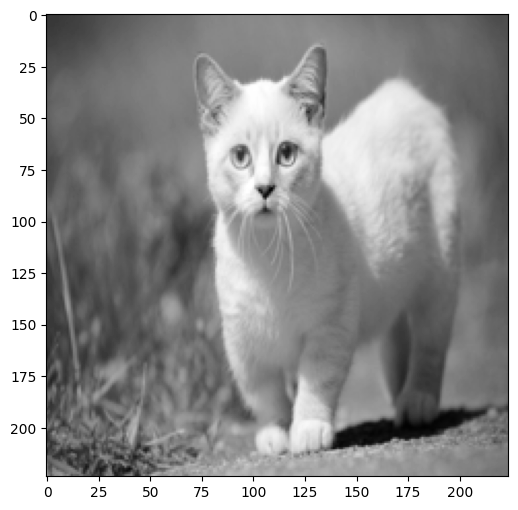

In [64]:
img = Image.open('./datasets/cat.jpeg')
img = ImageOps.grayscale(img)
img = img.resize(size=(224, 224))
plot_image(img=img)

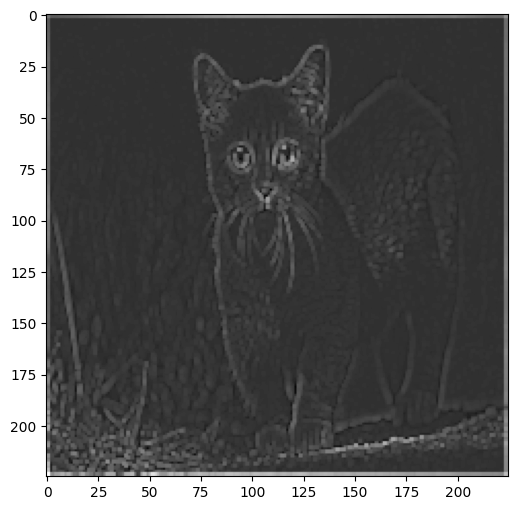

In [65]:
output=conv2d(np.array(img),kernal=outline,padding='same')
output=pool2d(output,padding='same',pool_type='max')
plot_image(output)

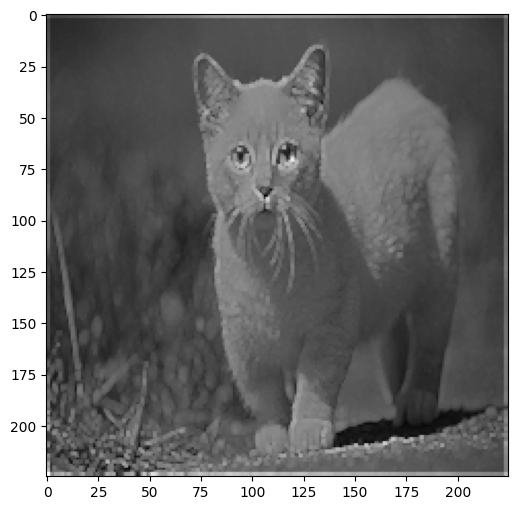

In [66]:
output=conv2d(np.array(img),kernal=sharpen,padding='same')
output=pool2d(output,padding='same')
plot_image(output)

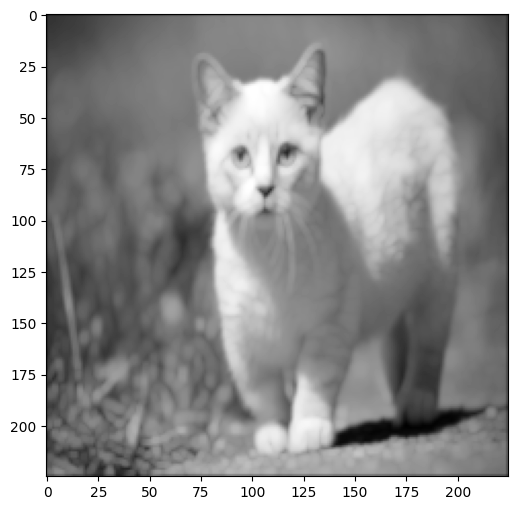

In [67]:
output=conv2d(np.array(img),kernal=blur,padding='same')
output=pool2d(output,padding='same')
plot_image(output)

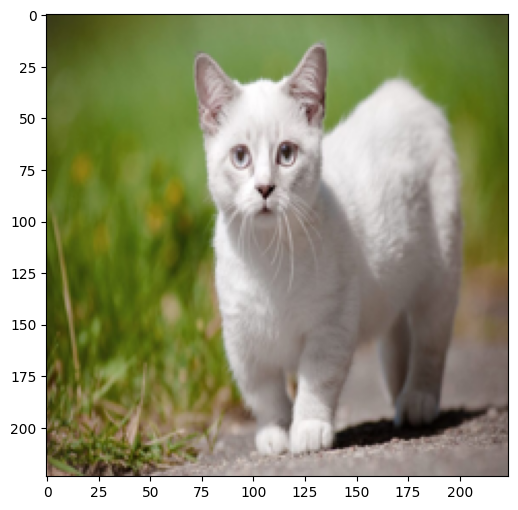

In [72]:
img = Image.open('./datasets/cat.jpeg')
img = img.resize(size=(224,224))
plot_rgb_image(img=img)

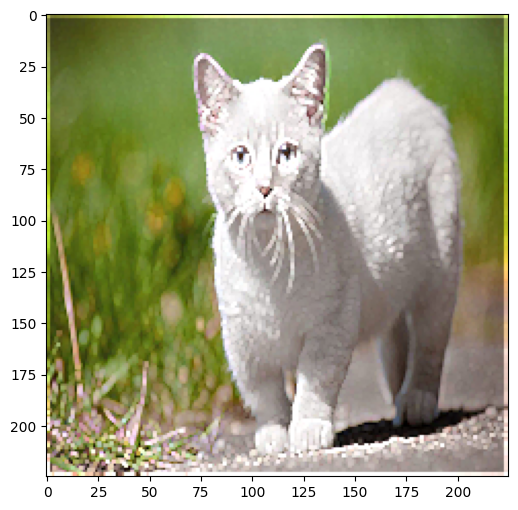

In [73]:
output=conv3d(np.array(img),kernal=sharpen,padding='same')
output=pool3d(output,padding='same',pool_type='max')
plot_rgb_image(output)

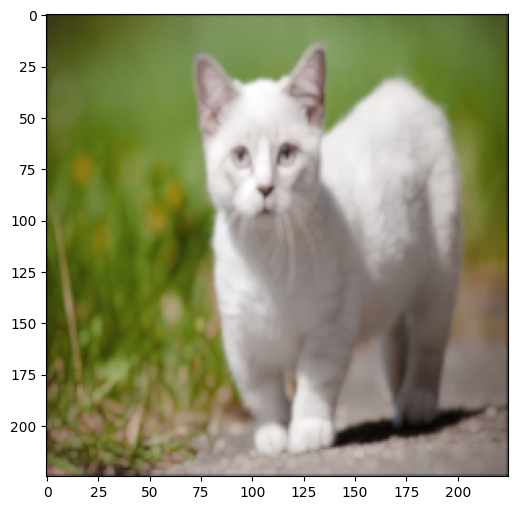

In [74]:
output=conv3d(np.array(img),kernal=blur,padding='same')
output=pool3d(output,padding='same',pool_type='max')
plot_rgb_image(output)

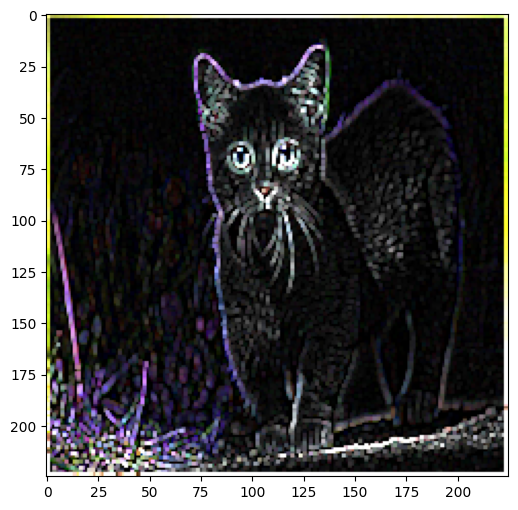

In [75]:
output=conv3d(np.array(img),kernal=outline,padding='same')
output=pool3d(output,padding='same',pool_type='max')
plot_rgb_image(output)